In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head()

Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  1207          37   
1      ...              170                   388          85   
2      ...              133                   340          16   
3      ...              150                   692          40   
4      ...             5180                 16697        1672   

   Unemployment_rate  Median  P25th   P75th  College_jobs  Non_college_jobs  \
0           0.018381  110000  95000  125000          1534               364   
1           0.117241   75000  55000   90000           350               257   
2           0.024096   73000  50000  105000           456               176   
3           0.050125   70000  43000   80000           529               102   
4           0.061098   65000  50000   75000         18314              4440   

   Low_wage_jobs  
0            193  
1             50  
2              0  
3              0  
4            972  

[5 rows x 21 columns]

In [2]:
print(recent_grads.shape[0])
print(recent_grads.dropna().shape[0])

recent_grads = recent_grads.dropna()

173
172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3766a15080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3764916be0>]], dtype=object)

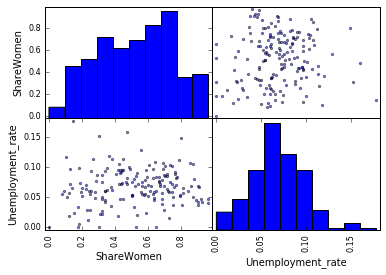

In [3]:
# Scatter plot that Pandas generates
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]])

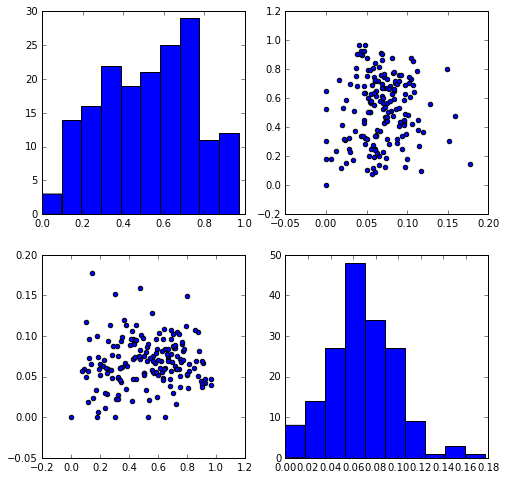

In [4]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,8))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])

# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])

# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])

# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

plt.show()

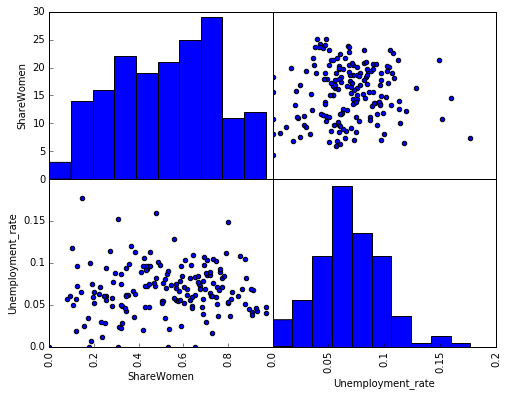

In [5]:
"""ticks and labels, subplots_adjust to remove horz and vertical spacing"""
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,6))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])
# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

# Top left plot
ax1_rg.set_ylabel("ShareWomen")
ax1_rg.get_xaxis().tick_top()
ax1_rg.get_xaxis().set_visible(False)
ax1_rg.get_yaxis().tick_left()
ax1_rg.set_ylim(0,30)
ax1_rg.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

# Top right plot
ax2_rg.get_yaxis().set_visible(False)
ax2_rg.get_xaxis().set_visible(False)
ax2_rg.set_xlim(0.0, 0.20)

# Bottom left plot
ax3_rg.set_xlabel("ShareWomen")
ax3_rg.set_ylabel("Unemployment_rate")
ax3_rg.get_xaxis().tick_bottom()
ax3_rg.get_yaxis().tick_left()
ax3_rg.set_ylim(0.00, 0.20)
ax3_rg.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3_rg.set_xlim(0.0, 1.0)
ax3_rg.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)

# Bottom right plot
ax4_rg.set_xlabel("Unemployment_rate")
ax4_rg.get_yaxis().set_visible(False)
ax4_rg.get_xaxis().tick_bottom()
ax4_rg.set_xlim(0.0, 0.20)
ax4_rg.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Remove space between sub plots.
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

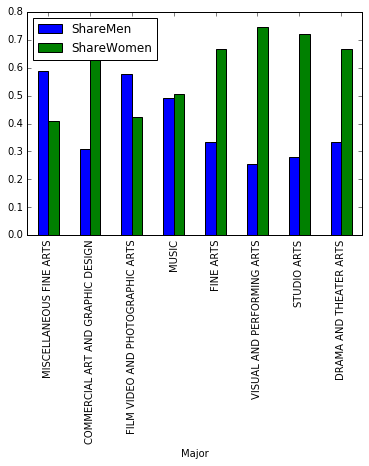

In [6]:
"""Divide the Men column by the Total column and assign it to a new column in the DataFrame called ShareMen
Import NumPy and use the NumPy function arange() to generate a list of integer values, from 0 to n-1, for each major (n majors total). 
generate bars"""
# Pandas generated grouped bar plot
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")

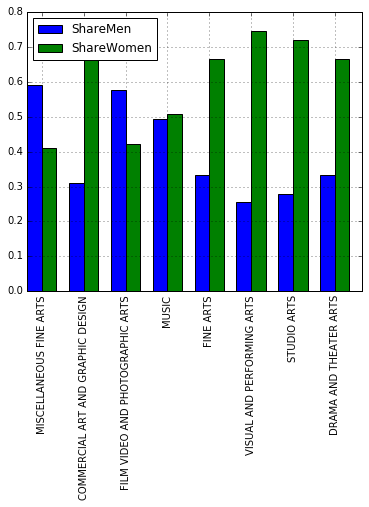

In [10]:
import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

arts = recent_grads[recent_grads["Major_category"] == "Arts"]
major_names = arts["Major"].tolist()
locs = np.arange(len(major_names))
width = 0.35

# List representation of these columns
men_proportions = arts["ShareMen"].tolist()
women_proportions = arts["ShareWomen"].tolist()

# Generate both the bars
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=90)

## Part 2

# Each value offset by `0.35`
offset_locs = locs + width

# Set of bars for `ShareWomen`
bar_2 = ax1_rg2.bar(offset_locs, women_proportions, width, color="green")

# Align x labels with bars better
ax1_rg2.set_xticks(offset_locs)

# Create a legend
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")

# Display the background grid
plt.grid()
plt.show()